<a href="https://colab.research.google.com/github/ljw1858/pythonMiniProject/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot, plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots



from collections import Counter

# Set Default Options
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix1.csv/netflix1.csv')

In [9]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [10]:
df.drop(columns="show_id", inplace=True)

In [11]:
df["type"].value_counts(normalize=1) * 100

Movie     69.693
TV Show   30.307
Name: type, dtype: float64

In [12]:
df["country"].value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [13]:
df["country"].nunique()

86

In [14]:
df["date_added"].dtype

dtype('O')

In [15]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [16]:
print(f"Oldest Added Date: {df['date_added'].min()}")
print(f"Newest Added Date: {df['date_added'].max()}")

Oldest Added Date: 2008-01-01 00:00:00
Newest Added Date: 2021-09-25 00:00:00


In [17]:
released_year = df.release_year.value_counts()
released_year

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [18]:
rating = df["rating"].value_counts()
rating

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [19]:
df["duration"].value_counts()

1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: duration, Length: 220, dtype: int64

In [20]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [21]:
print("Movie")
df.loc[df["type"] == "Movie", "rating"].value_counts().nlargest(1)

Movie


TV-MA    2062
Name: rating, dtype: int64

In [22]:
print("TV Show")
df.loc[df["type"] == "TV Show", "rating"].value_counts().nlargest(1)

TV Show


TV-MA    1143
Name: rating, dtype: int64

In [25]:
listed_in = df["listed_in"].str.split(", ")
listed_in.head()

0                                      [Documentaries]
1    [Crime TV Shows, International TV Shows, TV Ac...
2                 [TV Dramas, TV Horror, TV Mysteries]
3                 [Children & Family Movies, Comedies]
4    [Dramas, Independent Movies, International Mov...
Name: listed_in, dtype: object

In [26]:
counter = Counter()
for i in listed_in:
    counter.update(i)

In [77]:
top_10_listed_in = counter.most_common(10)[::-1]

In [78]:
data = counter.most_common(10)[::-1]
data

[('Romantic Movies', 616),
 ('Children & Family Movies', 641),
 ('Independent Movies', 756),
 ('TV Dramas', 762),
 ('Action & Adventure', 859),
 ('Documentaries', 869),
 ('International TV Shows', 1349),
 ('Comedies', 1674),
 ('Dramas', 2426),
 ('International Movies', 2752)]

In [79]:
key_list = []
value_list = []
for i in range (0, len(data)) :
    key_list.append(data[i][0])
    value_list.append(data[i][1])

print(key_list)
print(value_list)

['Romantic Movies', 'Children & Family Movies', 'Independent Movies', 'TV Dramas', 'Action & Adventure', 'Documentaries', 'International TV Shows', 'Comedies', 'Dramas', 'International Movies']
[616, 641, 756, 762, 859, 869, 1349, 1674, 2426, 2752]


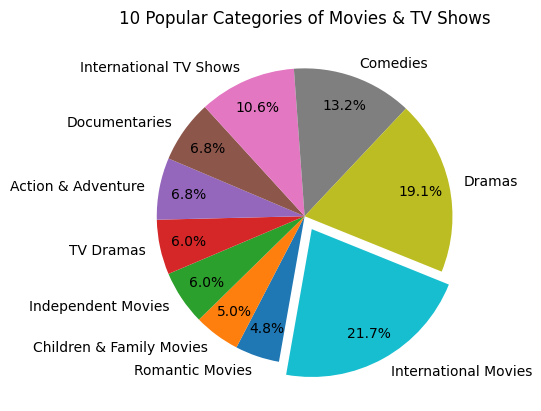

In [82]:
exp = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]

plt.pie(value_list, labels=key_list, autopct='%.1f%%', pctdistance=0.8, startangle=260, counterclock=False, explode=exp)
plt.title("10 Popular Categories of Movies & TV Shows")
plt.show()